In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [3]:
circ.shape

(500, 3)

In [4]:
X_ = circ.drop('class', axis=1)
y_ = circ['class']

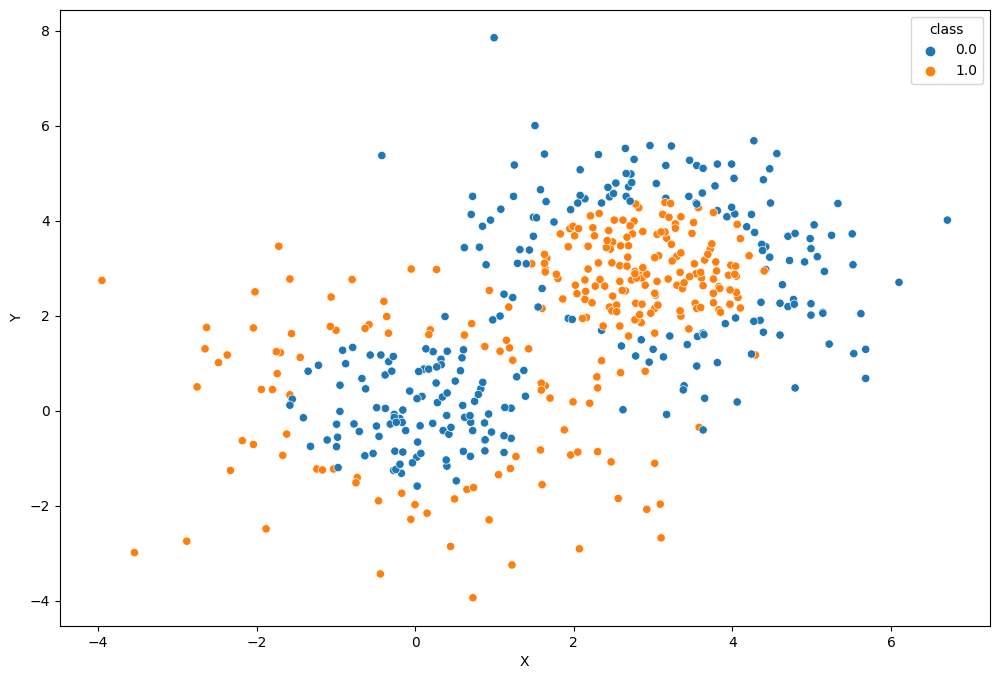

In [5]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [6]:
from sklearn.linear_model import LogisticRegression

### Your code is here

logreg = LogisticRegression()
logreg.fit(X_, y_)

LogisticRegression()

In [7]:
from sklearn.metrics import classification_report 
print(classification_report(y_true=y_, y_pred=logreg.predict(X_), digits=3))
print(f"accuracy: {logreg.score(X_, y_)}")

              precision    recall  f1-score   support

         0.0      0.432     0.484     0.457       250
         1.0      0.414     0.364     0.387       250

    accuracy                          0.424       500
   macro avg      0.423     0.424     0.422       500
weighted avg      0.423     0.424     0.422       500

accuracy: 0.424


In [8]:
#print(logreg.coef_.T, logreg.intercept_[0])

<AxesSubplot: >

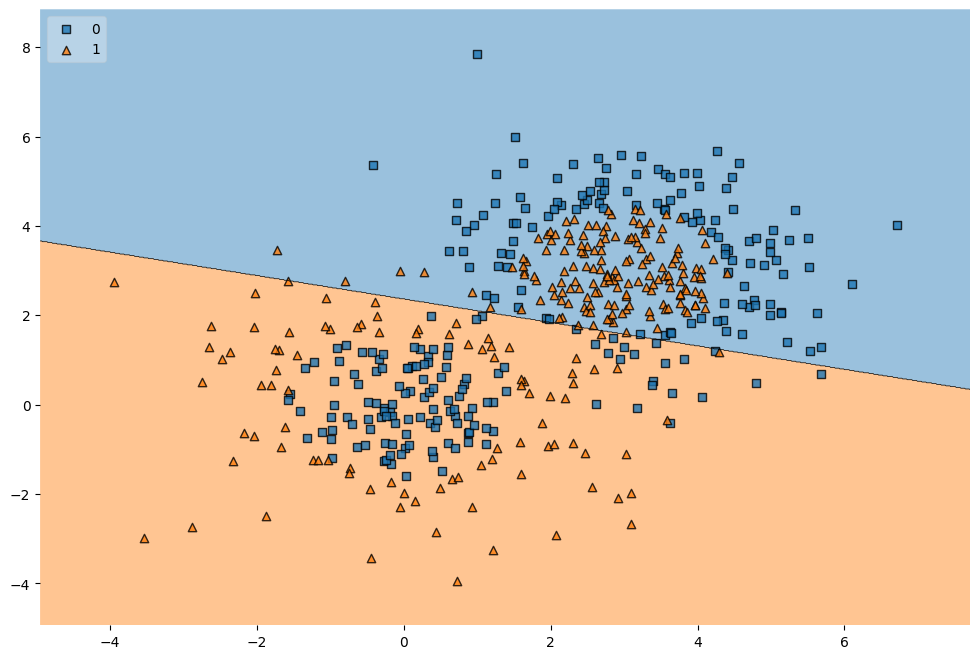

In [9]:
# здесь должен быть график!!!
#!pip install pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_.values, y=y_.values.astype('int'), clf=logreg, legend=2)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [10]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [12]:
#!pip install imblearn
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

for K in all_k:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    print(f"{K=}, {knn.score(X_test, y_test):.3f}, {knn.score(X_train, y_train):.3f}")

K=1, 0.890, 1.000
K=3, 0.870, 0.948
K=10, 0.850, 0.915
K=30, 0.740, 0.853
K=40, 0.750, 0.800
K=60, 0.730, 0.693


In [13]:
__

LogisticRegression()

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [14]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [15]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [16]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# подберем лучший гиперпараметр для knn

param_grid = {
    'n_neighbors': [1, 5, 10]
}

knn_2_ = KNeighborsClassifier()

search = GridSearchCV(knn_2_, param_grid, cv=5)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.46520):
{'n_neighbors': 10}


In [19]:
# подберем лучший гиперпараметр для knn на отнормированных данных
param_grid_knn = {
    'KNN__n_neighbors': [1, 5, 10]
}
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier())])

search_2 = GridSearchCV(pipe, param_grid_knn, cv=5)
search_2.fit(X, y)

print(f"Best parameter (CV score={search_2.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.66109):
{'n_neighbors': 10}


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
%%time
### Your code is here

pipe_m = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, 
                                              metric='minkowski',
                                             p=1,
                                             n_jobs=-1)
                 )])


pipe_m.fit(X_train, y_train)

# print(f"{pipe_m.score(X_test, y_test):.3f}, {pipe_m.score(X_train, y_train):.3f}")
# print(classification_report(y_true=y_test, y_pred=pipe_m.predict(X_test), digits=3))


In [29]:
%%time
print(f"Качество на тесте: {pipe_m.score(X_test, y_test):.2f}, Качество на train: {pipe_m.score(X_train, y_train):.2f}")

K=60, 0.66, 0.71


In [26]:
print(f"Качество на тесте: {np.mean(pipe_m.predict(X_test) == y_test).round(3)}")

Качество на тесте: 0.661


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [30]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


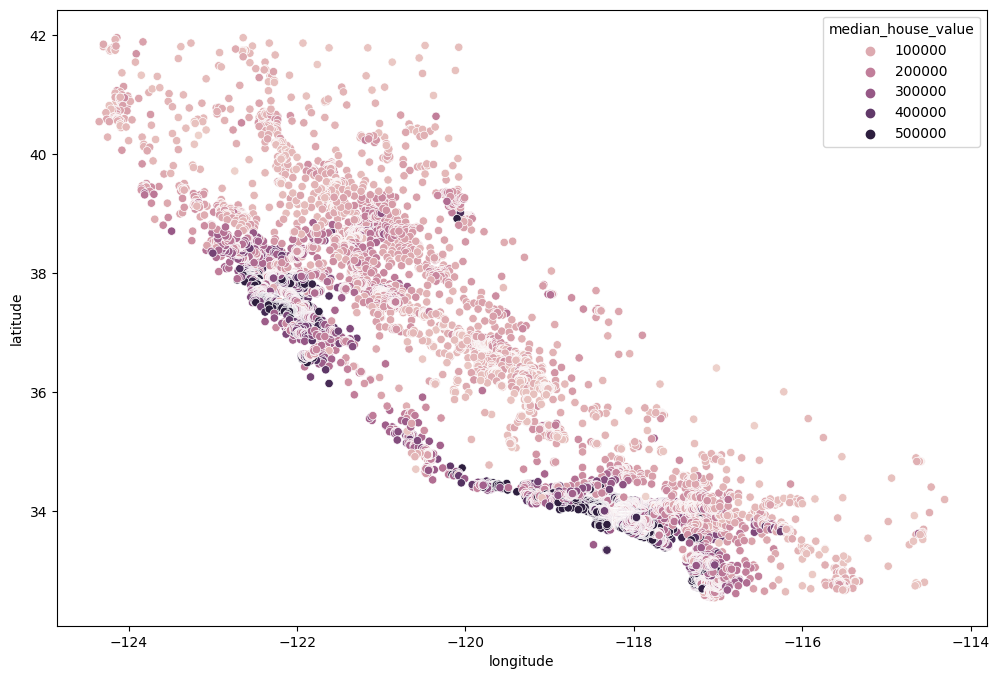

In [31]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [40]:
%%time
### Your code is here
### Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры 𝑘∈[1,2,...,9]
from sklearn.neighbors import KNeighborsRegressor
param_grid_knn = {
    'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
pipe_house = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsRegressor())])

search_3 = GridSearchCV(pipe_house, param_grid_knn, cv=5, n_jobs=-1)
search_3.fit(X, y)

print(f"Best parameter (CV score={search_3.best_score_:.5f}):")
print(search_3.best_params_)


Best parameter (CV score=0.14442):
{'KNN__n_neighbors': 10}
CPU times: user 61.3 ms, sys: 15.9 ms, total: 77.2 ms
Wall time: 356 ms


In [52]:
### Ширина Гауссовского ядра
from sklearn.neighbors import KernelDensity
k=1

for h in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=10, weights=kernel)
    knn.fit(X_train, y_train)
#     print(f"{h=}, {knn.score(X_test, y_test):.3f}, {knn.score(X_train, y_train):.3f}")
    knn_preds = knn.predict(X_test)
    print(f"{h=},RMSE KNN модели на новых данных: {(np.mean((knn_preds-y_test)**2)**0.5).round(3)}")


h=0.02,RMSE KNN модели на новых данных: 52117.092
h=0.03,RMSE KNN модели на новых данных: 52284.065
h=0.04,RMSE KNN модели на новых данных: 52319.848
h=0.05,RMSE KNN модели на новых данных: 52340.23
h=0.06,RMSE KNN модели на новых данных: 52378.704
h=0.07,RMSE KNN модели на новых данных: 52418.326
h=0.08,RMSE KNN модели на новых данных: 52451.64
h=0.09,RMSE KNN модели на новых данных: 52477.749


`При увеличении размера окна RMSE увеличивается`